# Explore here

In [1]:
# Your code here

- www.kaggle.com/competitions/acea-water-prediction/overview/description

- **Description**

Welcome

The Acea Group is one of the leading Italian multiutility operators. Listed on the Italian Stock Exchange since 1999, the company manages and develops water and electricity networks and environmental services. 
Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Lazio, Tuscany, Umbria, Molise, Campania.

In this competition we will focus only on the water sector to help Acea Group preserve precious waterbodies. 
As it is easy to imagine, a water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. 
During fall and winter waterbodies are refilled, but during spring and summer they start to drain. To help preserve the health of these waterbodies it is important to predict the most efficient water availability, 
in terms of level and water flow for each day of the year.

**Data**

The reality is that each waterbody has such unique characteristics that their attributes are not linked to each other. This analytics competition uses datasets that are completely independent from each other. 
However, it is critical to understand total availability in order to preserve water across the country.

Each dataset represents a different kind of waterbody. As each waterbody is different from the other, the related features are also different. 
So, if for instance we consider a water spring we notice that its features are different from those of a lake. 
These variances are expected based upon the unique behavior and characteristics of each waterbody. 

    The Acea Group deals with four different type of waterbodies: 

        - water springs

        - lakes

        - rivers

        - aquifers

![Alt text](../data/raw/competitions_Acea_Screen_Shot_2020-12-02_at_12.40.17_PM.png)

**Challenge**

Can you build a story to predict the amount of water in each unique waterbody? The challenge is to determine how features influence the water availability of each presented waterbody. 
To be more straightforward, gaining a better understanding of volumes, they will be able to ensure water availability for each time interval of the year.

The time interval is defined as day/month depending on the available measures for each waterbody. Models should capture volumes for each waterbody(for instance, 
for a model working on a monthly interval a forecast over the month is expected).

The desired outcome is a notebook that can generate four mathematical models, one for each category of waterbody (acquifers, water springs, river, lake) 
that might be applicable to each single waterbody.

![Alt text](../data/raw/inbox_6195295_cca952eecc1e49c54317daf97ca2cca7_Acea-Input.png)

- Waterbody: Lupa

Type: Water spring

Description: this water spring is located in the Rosciano Valley, on the left side of the Nera river. The waters emerge at an altitude of about 375 meters above sea level through a long draining tunnel that crosses, in its final section, lithotypes and essentially calcareous rocks. It provides drinking water to the city of Terni and the towns around it.

- **CLEANING DATA**

In [2]:
import os
import pandas as pd
import csv

df = pd.read_csv("../data/raw/Water_Spring_Lupa.csv", sep = ",")

df.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4199 non-null   object 
 1   Rainfall_Terni  4199 non-null   float64
 2   Flow_Rate_Lupa  3817 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.5+ KB


- 3 columns
- 4199 rows
- **TARGET IS Flow_Rate_Lupa**

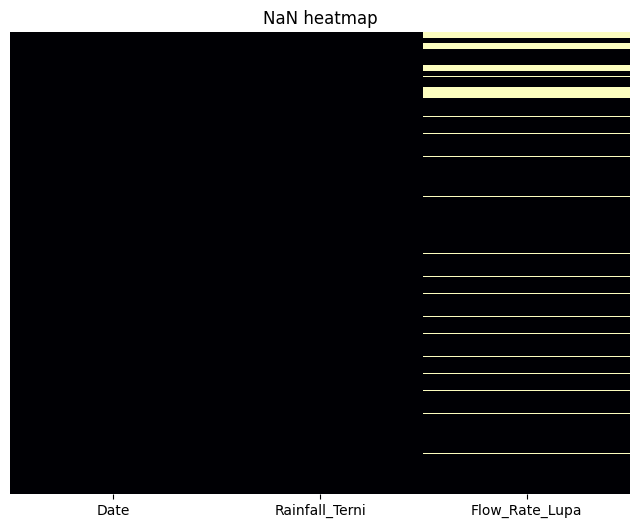

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="magma", linecolor='gray')

plt.title("NaN heatmap")

plt.show()

In [5]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage.sort_values(ascending=False))

Flow_Rate_Lupa    9.097404
Date              0.000000
Rainfall_Terni    0.000000
dtype: float64


There's not much missing data compared to the other datasets, only **~9%** of data is missing in the column **Flow_Rate_Lupa**

To handle this missing data we'll fill the NaN values using interpolation and backward/forward fill if there are any remaining NaN values

In [6]:
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
df.tail().style.set_properties(subset=['Date'], **{'background-color':'orange'})

,Date,Rainfall_Terni,Flow_Rate_Lupa
4194,2020-06-26 00:00:00,0.000000,-73.930000
4195,2020-06-27 00:00:00,0.000000,-73.600000
4196,2020-06-28 00:00:00,0.000000,-73.140000
4197,2020-06-29 00:00:00,0.000000,-72.880000
4198,2020-06-30 00:00:00,0.000000,-72.550000


In [7]:
import numpy as np

df.set_index('Date', inplace=True)
df['Flow_Rate_Lupa'] = df['Flow_Rate_Lupa'].replace(0, np.nan)
df['Flow_Rate_Lupa'] = df['Flow_Rate_Lupa'].interpolate(method='time')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4199 entries, 2009-01-01 to 2020-06-30
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rainfall_Terni  4199 non-null   float64
 1   Flow_Rate_Lupa  4150 non-null   float64
dtypes: float64(2)
memory usage: 98.4 KB


In [8]:
df.fillna(method='bfill', inplace=True)
df.head(10)

/tmp/ipykernel_30971/3511150871.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


,Rainfall_Terni,Flow_Rate_Lupa
Date,,
2009-01-01,2.797,-166.02
2009-01-02,2.797,-166.02
2009-01-03,2.797,-166.02
2009-01-04,2.797,-166.02
2009-01-05,2.797,-166.02
2009-01-06,2.797,-166.02
2009-01-07,2.797,-166.02
2009-01-08,2.797,-166.02
2009-01-09,2.797,-166.02


In [9]:
df["Flow_Rate_Lupa"].value_counts()

Flow_Rate_Lupa
-166.02    50
-87.42      3
-102.50     3
-113.96     3
-87.86      3
           ..
-88.20      1
-88.21      1
-88.22      1
-88.23      1
-88.09      1
Name: count, Length: 3962, dtype: int64

In [10]:
df.describe()

,Rainfall_Terni,Flow_Rate_Lupa
count,4199.000000,4199.000000
mean,2.466355,-98.646722
std,2.041837,18.275239
min,0.000000,-182.310000
25%,1.402000,-106.105000
50%,2.142000,-96.340000
75%,3.165000,-86.395000
max,76.000000,-72.550000


Once done handling the NaN data we can start visualizing trends and seasonality

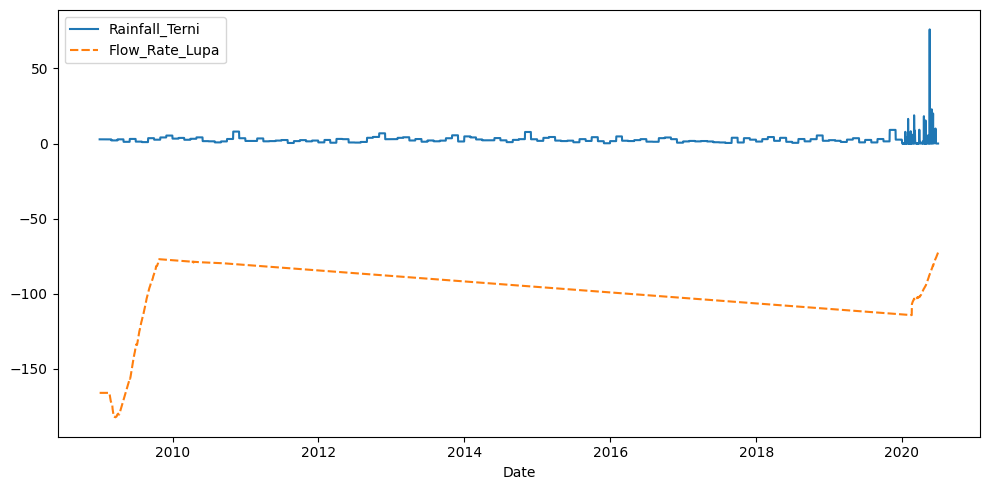

In [11]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
plt.tight_layout()

plt.show()

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

rain_decomposition = seasonal_decompose(df["Rainfall_Terni"], period=12)
flow_decomposition = seasonal_decompose(df["Flow_Rate_Lupa"], period=12)

rain_decomposition
flow_decomposition

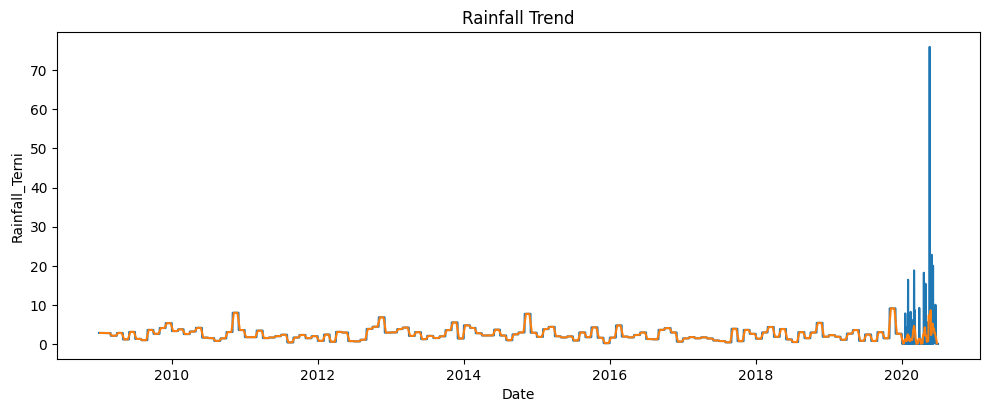

In [13]:
trend = rain_decomposition.trend

fig, axis = plt.subplots(figsize = (10, 4))

sns.lineplot(data = df["Rainfall_Terni"])
sns.lineplot(data = trend)

plt.tight_layout()
plt.title("Rainfall Trend")

plt.show()

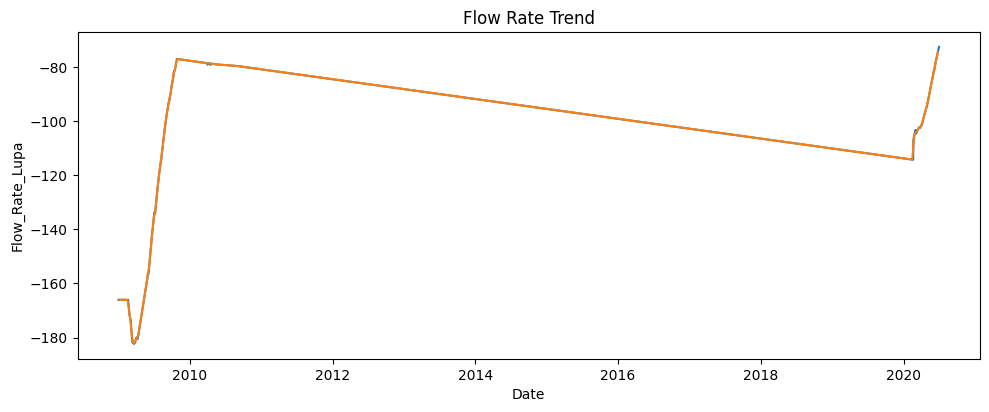

In [14]:
trend = flow_decomposition.trend

fig, axis = plt.subplots(figsize = (10, 4))

sns.lineplot(data = df["Flow_Rate_Lupa"])
sns.lineplot(data = trend)

plt.tight_layout()
plt.title("Flow Rate Trend")

plt.show()

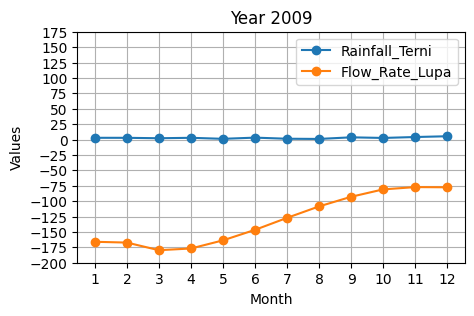

<Figure size 500x300 with 0 Axes>

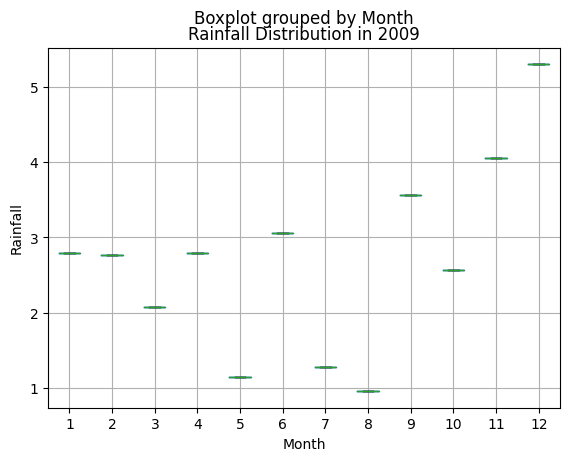

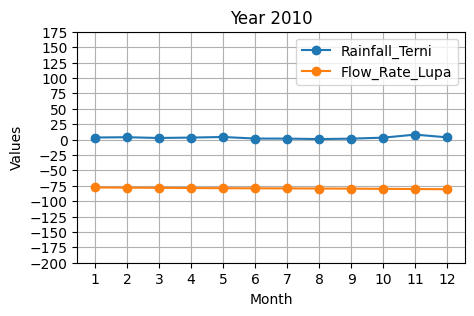

<Figure size 500x300 with 0 Axes>

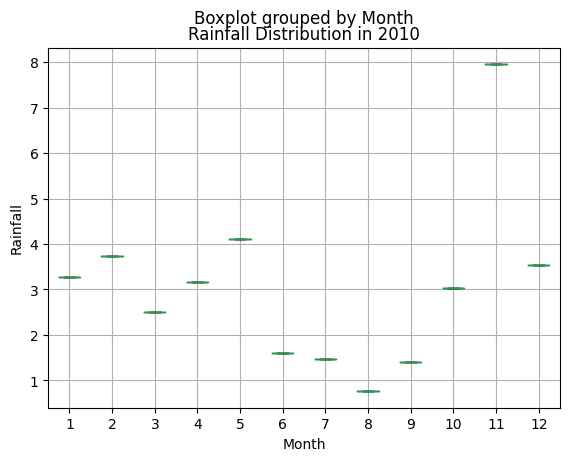

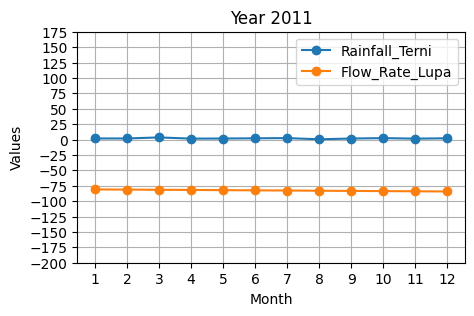

<Figure size 500x300 with 0 Axes>

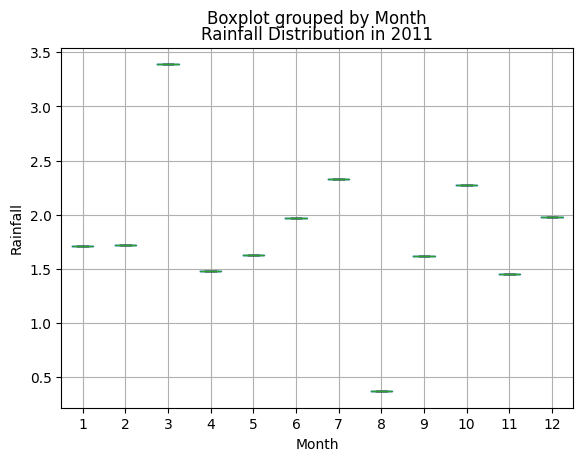

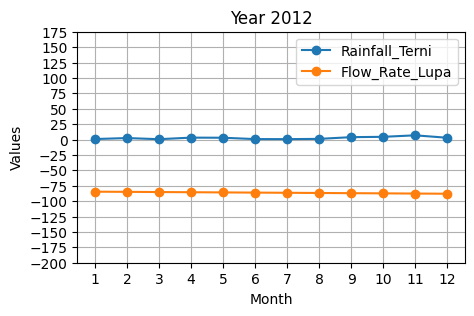

<Figure size 500x300 with 0 Axes>

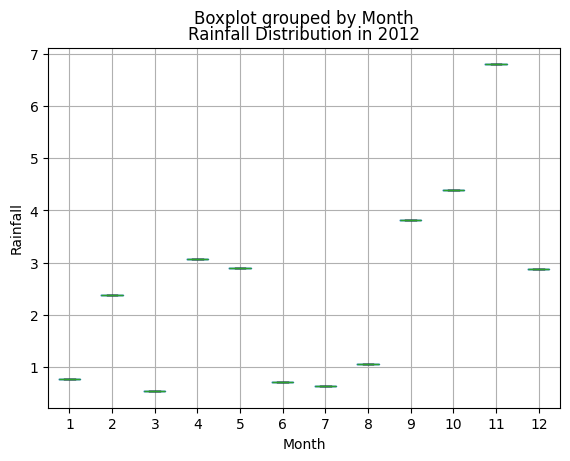

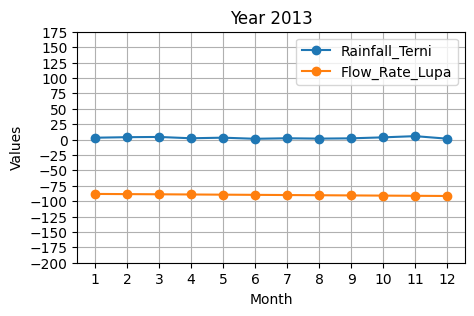

<Figure size 500x300 with 0 Axes>

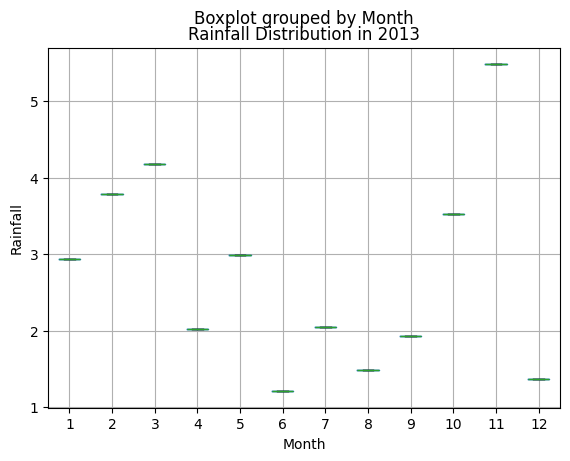

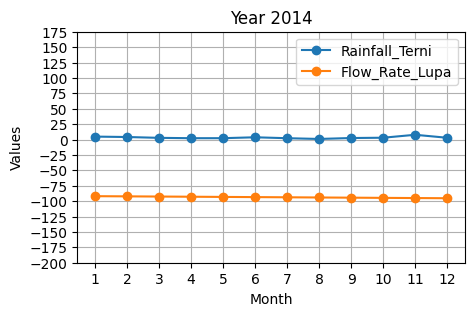

<Figure size 500x300 with 0 Axes>

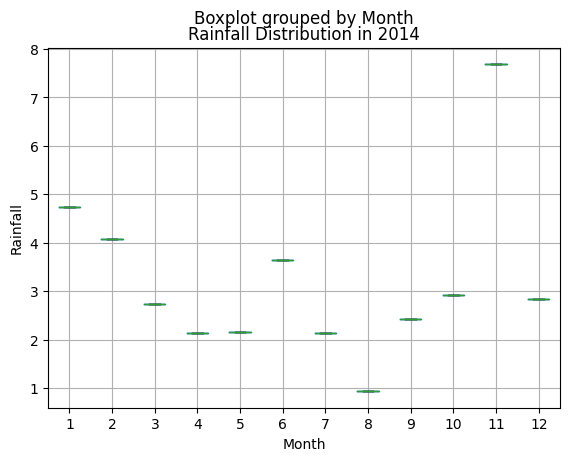

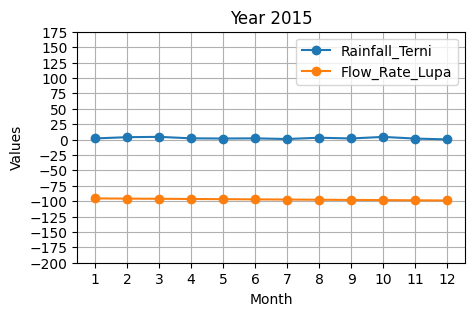

<Figure size 500x300 with 0 Axes>

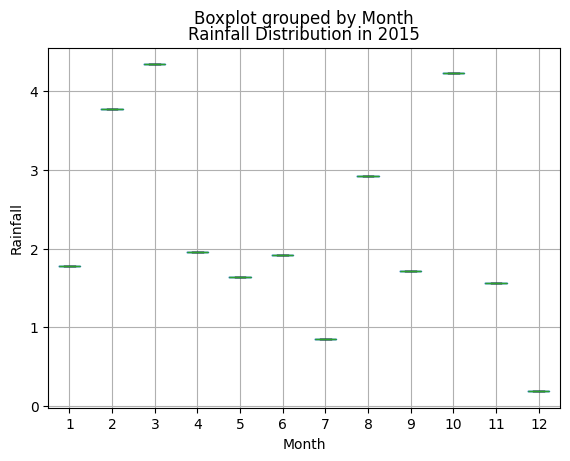

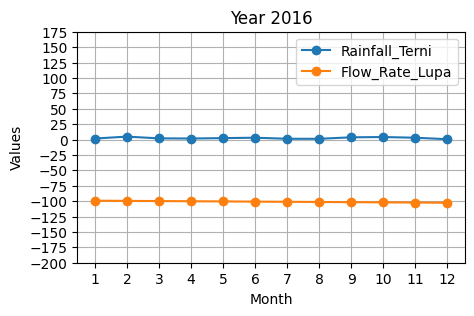

<Figure size 500x300 with 0 Axes>

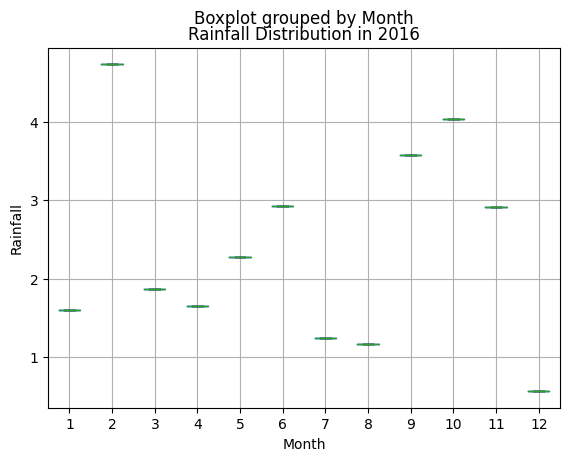

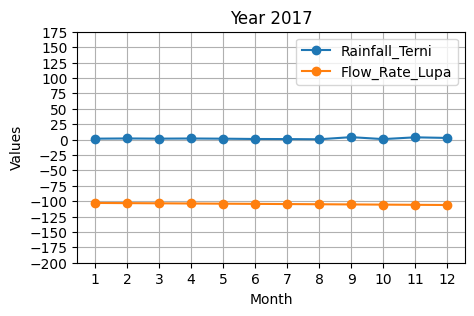

<Figure size 500x300 with 0 Axes>

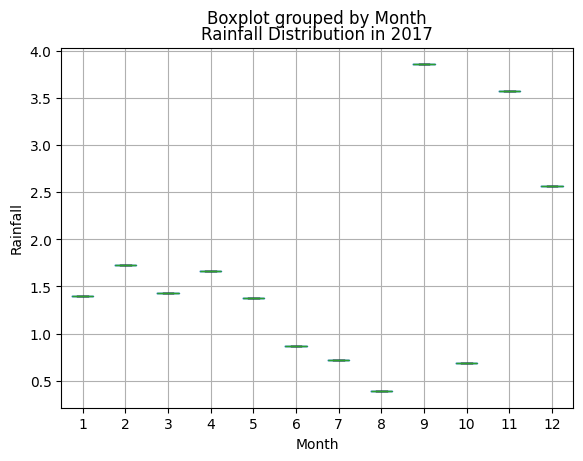

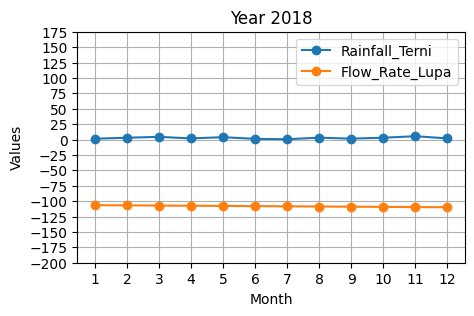

<Figure size 500x300 with 0 Axes>

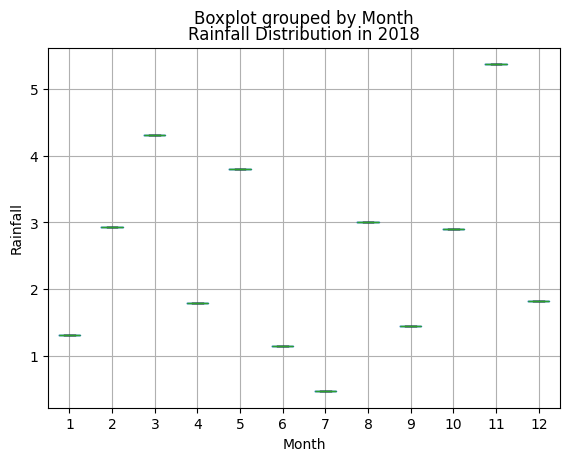

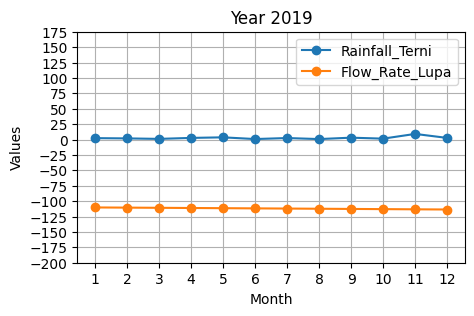

<Figure size 500x300 with 0 Axes>

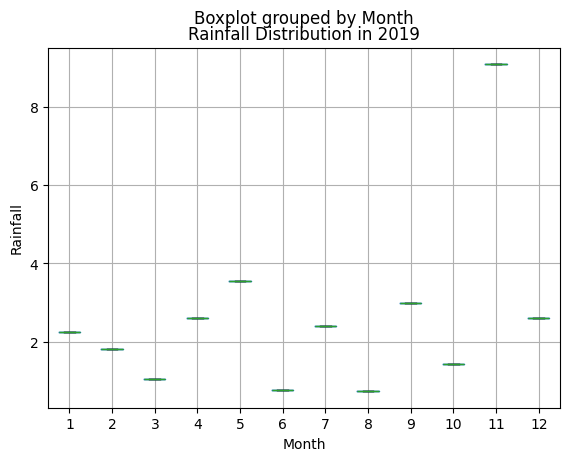

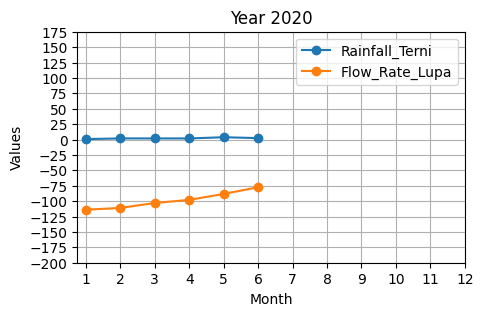

<Figure size 500x300 with 0 Axes>

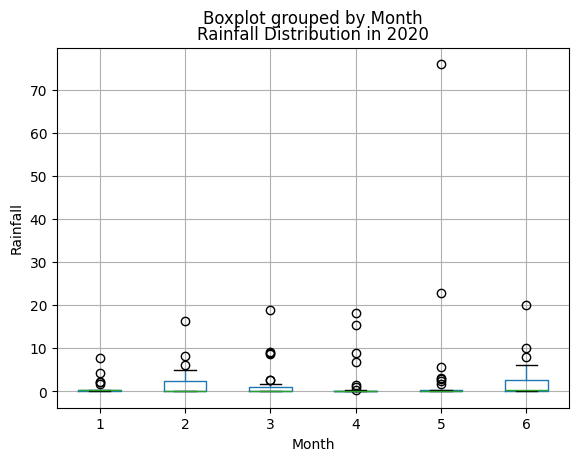

In [15]:
plot_df = df.copy()
plot_df['Year'] = df.index.year
plot_df['Month'] = df.index.month

columns_to_plot = ['Rainfall_Terni', 'Flow_Rate_Lupa']

for year, group in plot_df.groupby('Year'):
    plt.figure(figsize=(5, 3))
    
    monthly_means = group.groupby('Month')[columns_to_plot].mean()
    monthly_means.plot(kind='line', marker='o', ax=plt.gca())

    plt.title(f'Year {year}')
    plt.xlabel('Month')
    plt.ylabel('Values')
    plt.xticks(range(1, 13))
    plt.legend(columns_to_plot)
    plt.grid(True)

    plt.yticks(np.arange(-200, 200, 25))

    plt.show()

    plt.figure(figsize=(5, 3))
    group.boxplot(column='Rainfall_Terni', by='Month')
    plt.title(f'Rainfall Distribution in {year}')
    plt.xlabel("Month")
    plt.ylabel("Rainfall")
    plt.grid(True)
    plt.show()

As shown in the graphs, there's an increase in the flow rate during 2009, a steady decrease until 2019 and a steep increase in 2020, there seems to be a cycle of ~10 years

The increase on 2020 will possibly be related to the rainfall increase in that year  

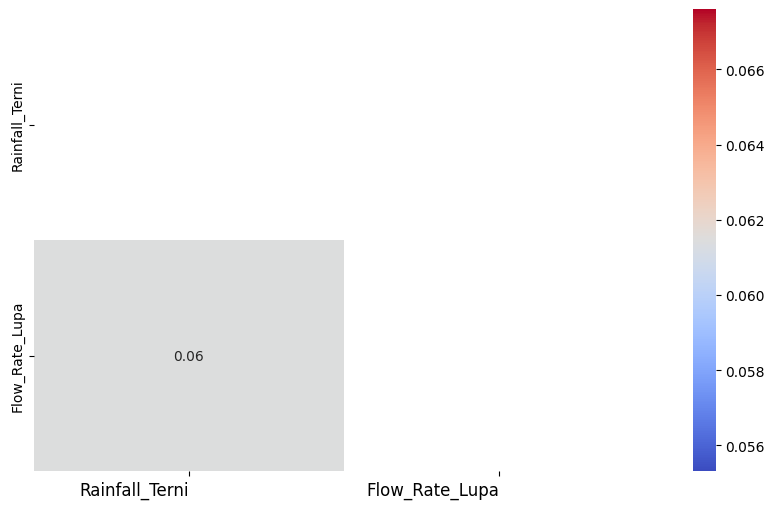

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", mask=mask)
plt.xticks(fontsize=12, ha="right")
plt.show()

- **PREDICTION**

In [17]:
'''from sklearn.model_selection import train_test_split

y = df['Flow_Rate_Lupa']
X = df.drop('Flow_Rate_Lupa', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, shuffle = False)'''

"from sklearn.model_selection import train_test_split\n\ny = df['Flow_Rate_Lupa']\nX = df.drop('Flow_Rate_Lupa', axis = 1)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, shuffle = False)"

In [18]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries.dropna(), autolag="AIC")
    
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value
  
    dfoutput = dfoutput.apply(lambda x: f"{x:.5f}")

    return dfoutput

rain_result = test_stationarity(df["Rainfall_Terni"])
flow_result = test_stationarity(df["Flow_Rate_Lupa"])
print(f"Rain: \n{rain_result}\n")
print(f"Flow: \n{flow_result}")

Dickey-Fuller test results:
Dickey-Fuller test results:
Rain: 
Test Statistic                   -9.08866
p-value                           0.00000
#Lags Used                       31.00000
Number of Observations Used    4167.00000
Critical Value (1%)              -3.43192
Critical Value (5%)              -2.86223
Critical Value (10%)             -2.56714
dtype: object

Flow: 
Test Statistic                   -4.18327
p-value                           0.00070
#Lags Used                       31.00000
Number of Observations Used    4167.00000
Critical Value (1%)              -3.43192
Critical Value (5%)              -2.86223
Critical Value (10%)             -2.56714
dtype: object


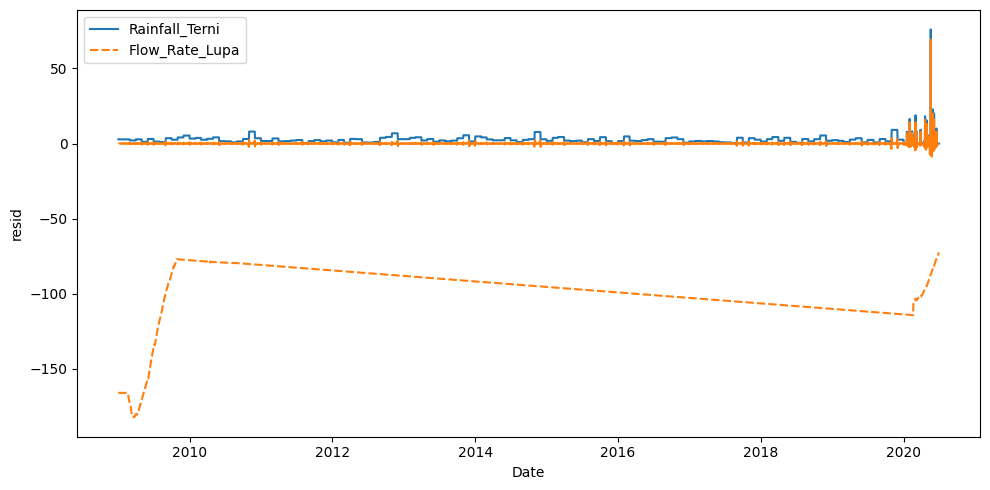

In [19]:
residual = rain_decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

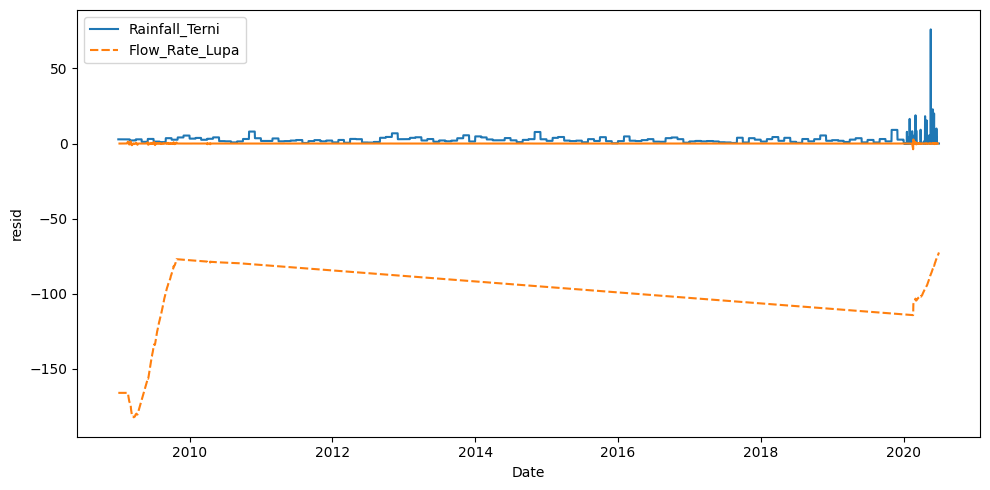

In [20]:
residual = flow_decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

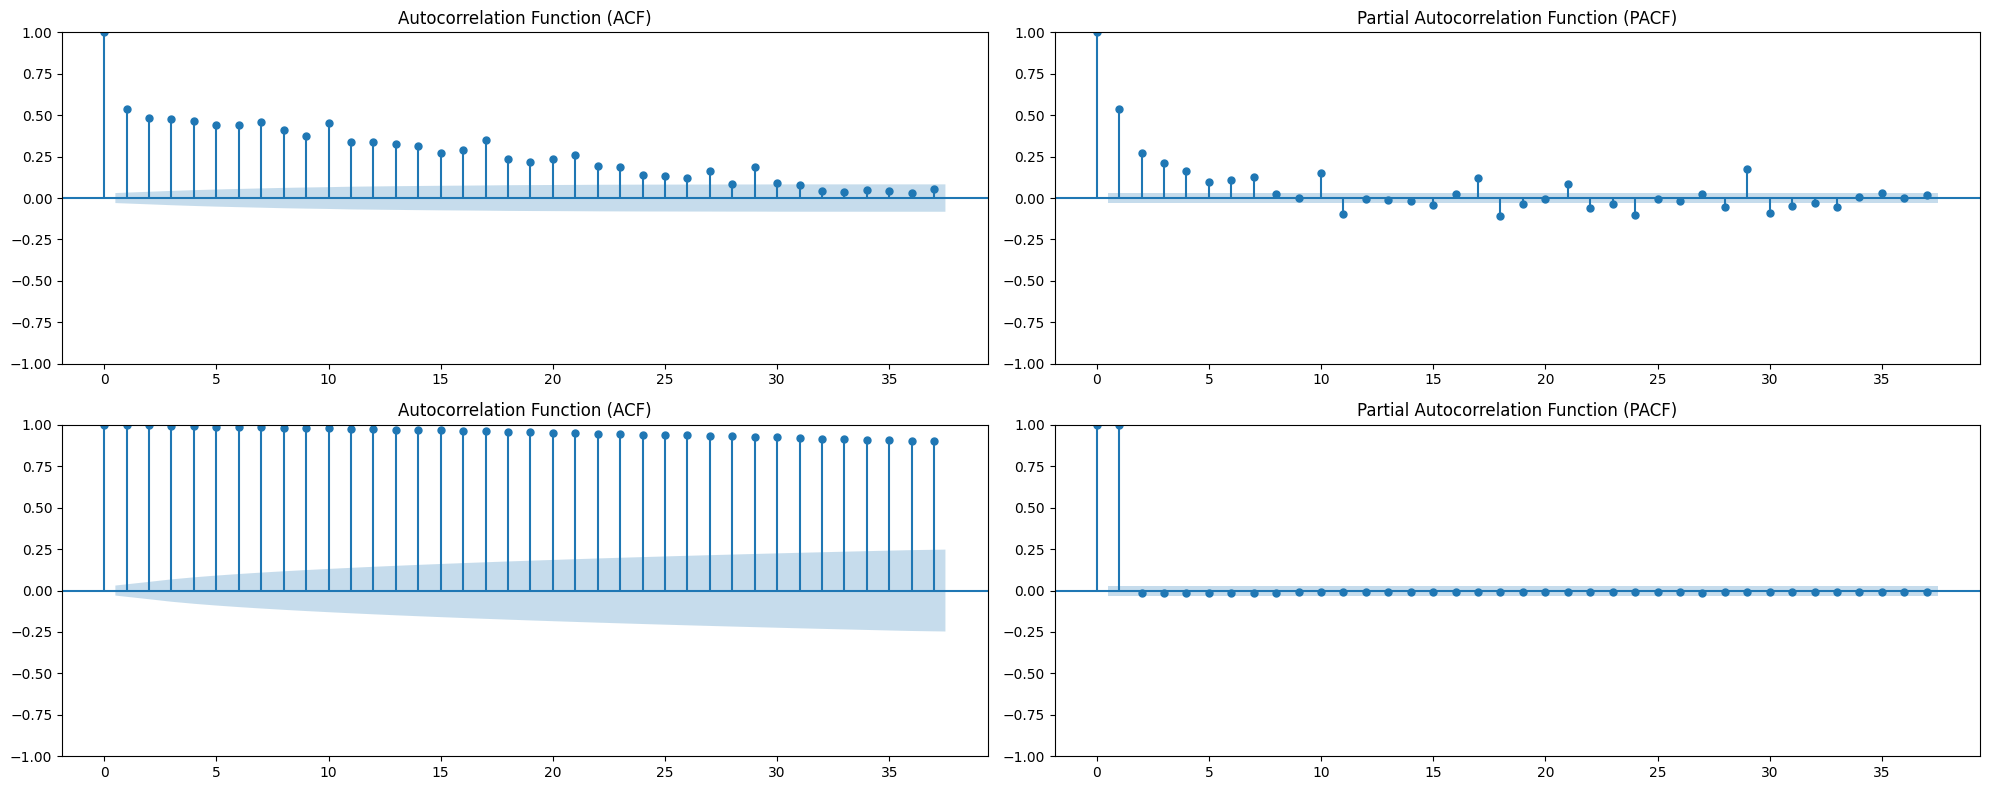

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 2, figsize=(20, 8))


plot_acf(df["Rainfall_Terni"], ax=axes[0,0])
axes[0,0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df["Rainfall_Terni"], ax=axes[0,1])
axes[0,1].set_title("Partial Autocorrelation Function (PACF)")


plot_acf(df["Flow_Rate_Lupa"], ax=axes[1,0])
axes[1,0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df["Flow_Rate_Lupa"], ax=axes[1,1])
axes[1,1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [22]:
flow_stationary = df["Flow_Rate_Lupa"].diff().dropna()

test_stationarity(flow_stationary)

Dickey-Fuller test results:


Test Statistic                   -4.25852
p-value                           0.00052
#Lags Used                       31.00000
Number of Observations Used    4166.00000
Critical Value (1%)              -3.43192
Critical Value (5%)              -2.86223
Critical Value (10%)             -2.56714
dtype: object

In [24]:
! pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [27]:
df.head()

,Rainfall_Terni,Flow_Rate_Lupa
Date,,
2009-01-01,2.797,-166.02
2009-01-02,2.797,-166.02
2009-01-03,2.797,-166.02
2009-01-04,2.797,-166.02
2009-01-05,2.797,-166.02


In [26]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['Date']
y = df['Flow_Rate_Lupa']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

KeyError: 'Date'

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject